# Imports

In [11]:
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage import io 
import skimage 
%matplotlib inline

# Download and organize the dataset (No Code required here)

In [12]:
%%capture

import requests
url = 'http://vision.soic.indiana.edu/egohands_files/egohands_data.zip'
r = requests.get(url, allow_redirects=True)
open('egohands_data.zip', 'wb').write(r.content)

!rm -r data
!rm -r temp
!mkdir data
!mkdir temp
!unzip egohands_data.zip -d temp/
!cp -r /content/temp/_LABELLED_SAMPLES/CARDS_OFFICE_B_S/* /content/data/
!rm /content/data/polygons.mat
!rm -r temp

KeyboardInterrupt: 

# Read the images from the folder 'data' into a list



c:\Users\river\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\river\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\river\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\river\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


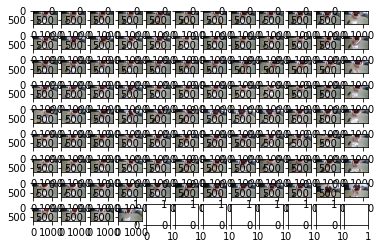

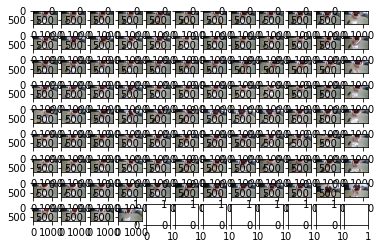

In [ ]:
# os.listdir <-- you may want to use this function
from skimage.io import imread_collection,imshow_collection

dataset_dir = "./data/CARDS_OFFICE_B_S/" # this is the directory of the dataset

# figuresFiles = os.listdir(dataset_dir)
file_spec = '*.JPG'
load_pattern = os.path.join(dataset_dir, file_spec)
imgs = imread_collection(load_pattern)
imshow_collection(imgs)
# # Your code here
# imgs = ...
# ##

In [ ]:
imgs.files

['./data/CARDS_OFFICE_B_S\\frame_0014.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0084.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0085.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0121.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0131.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0140.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0144.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0299.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0340.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0362.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0442.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0543.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0556.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0593.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0612.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0619.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0627.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0649.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0679.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0680.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0683.jpg',
 './data/CARDS_OFFICE_B_S\\frame_0698.jpg',
 './data/CARDS_OFFICE_B_S\\frame

# Define a function that takes a list of images then samples 9 iamges from the list, then draws them using matplotlib in a 3x3 grid

In [ ]:
imgs = np.array(imgs)
imgs.shape


(100, 720, 1280, 3)

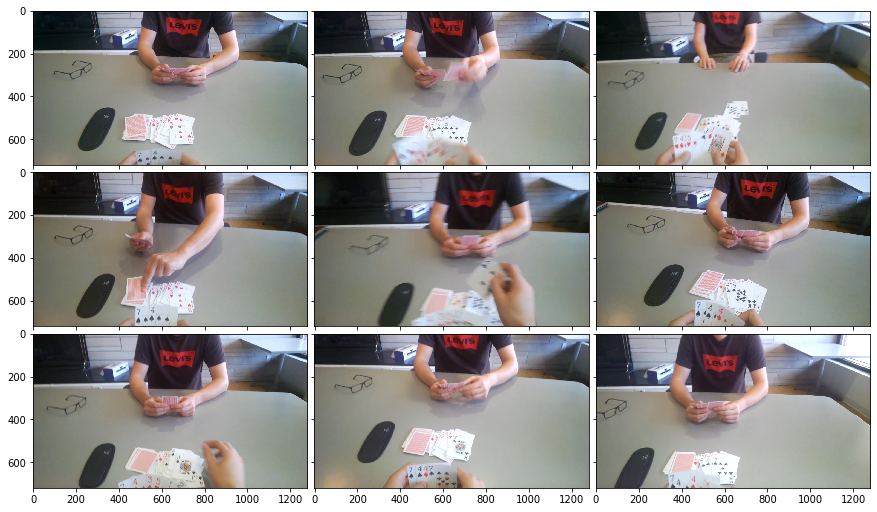

In [ ]:
import random # u may need this library
random.seed(100) # set a seed in case you want your experiments to be consistent

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np



def draw_func(list_of_imgs):
  # Your code here
  allIndexes = list(range(0,len(list_of_imgs)))
  sampleIndexes = random.sample(allIndexes,9)

  fig = plt.figure(figsize=(15., 20.))
  grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
  color= plt.cm.gray if len(list_of_imgs.shape) <= 3 else None
  for ax, im_index in zip(grid, sampleIndexes):
    # Iterating over the grid returns the Axes.
    ax.imshow(list_of_imgs[im_index],interpolation='none', cmap=color)
  plt.show()




## Test your function here
draw_func(imgs) # assuming that imgs is the name of the list
##

# Apply Gray scaling on the images

(100, 720, 1280)


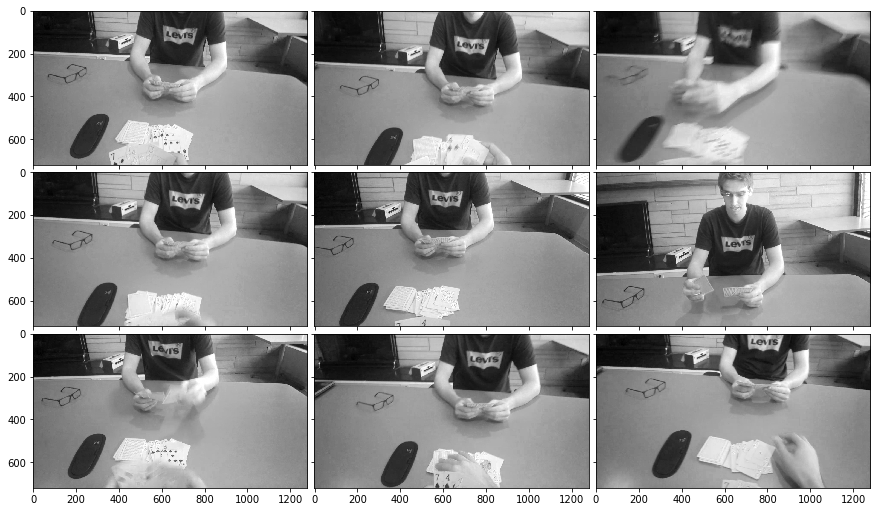

In [ ]:
# skimage.color.rgb2gray(an_img) <-- you may want to check this function



# Your code here
gray_scale_imgs = imgs.copy()[:,:,:,0]
##
print(gray_scale_imgs.shape)



# Use your draw function to visualize the images
draw_func(gray_scale_imgs) # assuming that gray_scale_imgs is the name of the list

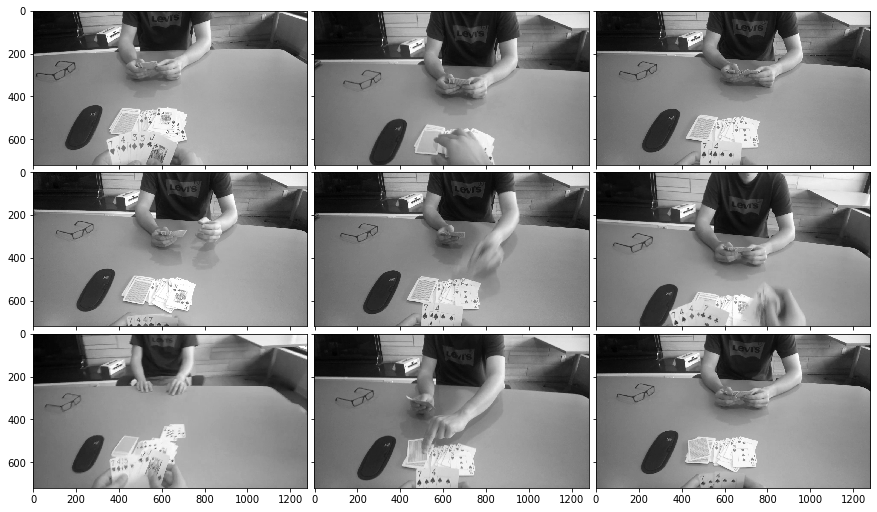

In [10]:
darkPic = skimage.color.rgb2gray(imgs)

# darkPic[:,:,0] = 0
# darkPic[:,:,1] = 0


draw_func(darkPic)

# Apply histogram equalization on the gray scale images

In [ ]:
def plot_histogram(image, axes, bins=256):
    """Plot an image's histogram along with cumulative histogram.
       Adapted from the scikit-image examples
    """
    image = skimage.img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram with mathplot hist
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = skimage.exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

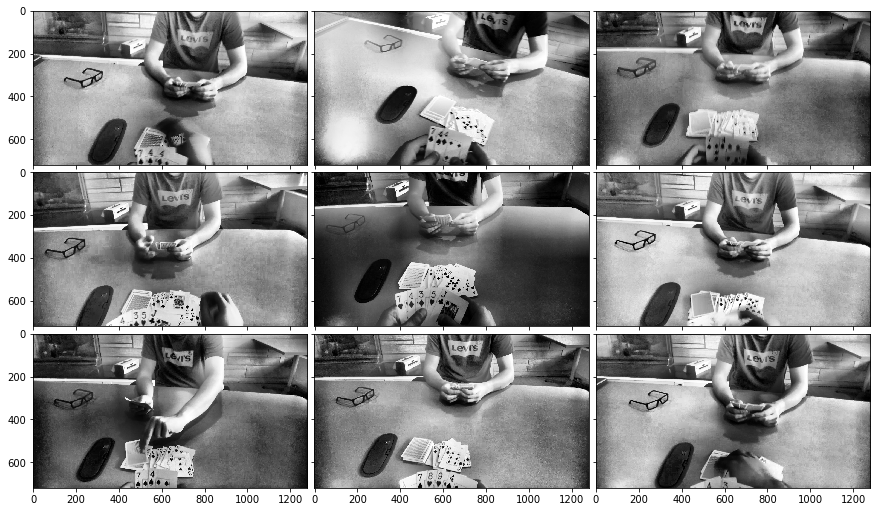

In [18]:
from skimage import exposure # You will probably need this function




# Your code here
# gray_img = darkPic
# fig = plt.figure(figsize=(16, 9))
# axes = np.zeros((2, 3), dtype=np.object)
# axes[0, 0] = fig.add_subplot(2, 3, 1)
# for i in range(1, 3):
#     axes[0, i] = fig.add_subplot(2, 3, 1+i, sharex=axes[0,0], sharey=axes[0,0])
# for i in range(0, 3):
#     axes[1, i] = fig.add_subplot(2, 3, 4+i)
# ax_img, ax_hist, ax_cdf = plot_histogram(gray_img, axes[:, 0])
# ax_img.set_title('Dark Image')    

# y_min, y_max = ax_hist.get_ylim()
# ax_hist.set_ylabel('Number of pixels')
# ax_hist.set_yticks(np.linspace(0, y_max, 5))

# ax_img, ax_hist, ax_cdf = plot_histogram(exposure.equalize_hist(gray_img), axes[:, 1])
# ax_img.set_title('Global')
adaptive_equalization = exposure.equalize_adapthist(darkPic, clip_limit=0.03)
draw_func(adaptive_equalization)


# Apply sobel edge detection on the equalized images

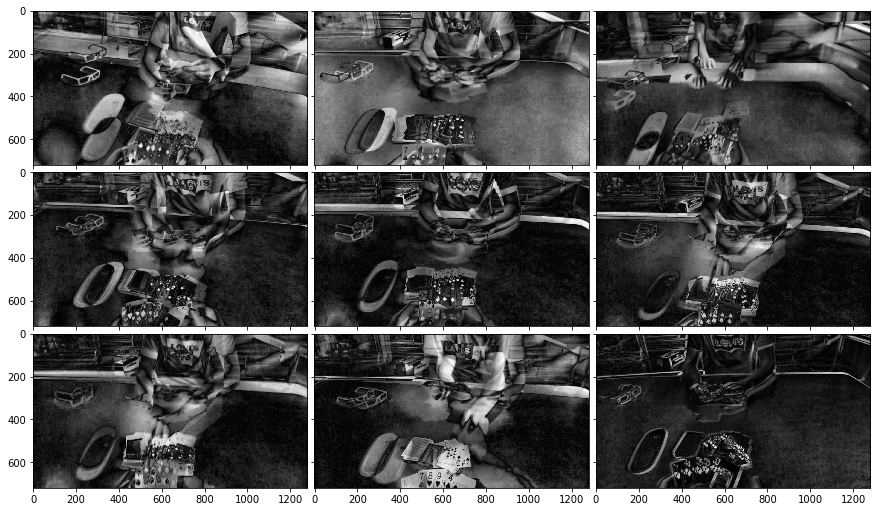

In [19]:
from skimage.filters import sobel # You will probably need this function




# Your code here
sobel_imgs =  sobel(adaptive_equalization)


# Use your draw function to visualize the images
draw_func(sobel_imgs)

# Apply Gaussian derivative over the equalized images

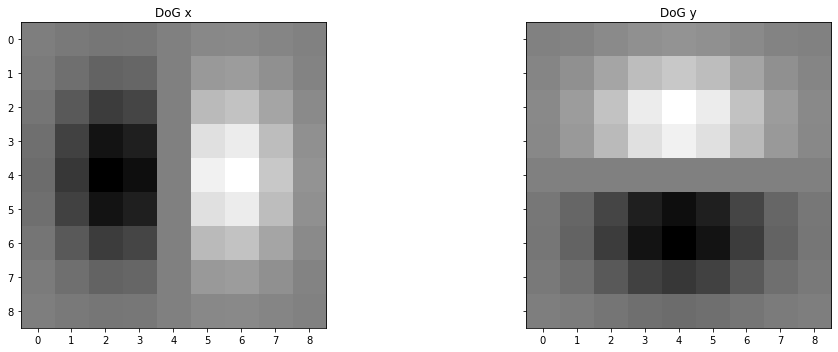

In [20]:
import scipy.ndimage

weights = np.zeros((9, 9))
weights[4,4] = 1.0
gaussF = scipy.ndimage.filters.gaussian_filter(weights, 1.5, order=0,truncate=3.0)

#Sobel mask in x
weights = np.zeros((3,3))
weights[:,0] = -np.ones((3,)) 
weights[:,2] = np.ones((3,)) 
DoGx = scipy.ndimage.convolve(gaussF, weights)

#Sobel mask in y
weights = np.zeros((3,3))
weights[0,:] = np.ones((3,)) 
weights[2,:] = -np.ones((3,)) 
DoGy = scipy.ndimage.convolve(gaussF, weights)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(16, 5))
ax[0].imshow(DoGx, cmap=plt.cm.gray)
ax[0].set_title('DoG x')

ax[1].imshow(DoGy, cmap=plt.cm.gray)
ax[1].set_title('DoG y')

plt.tight_layout()
plt.show()

In [40]:
# you better check lab 1 notebook

mag_imgs=[]
angles = []
# Your code here
for i in range(len(adaptive_equalization)):
    devX = scipy.ndimage.convolve(adaptive_equalization[i], DoGx)
    devY = scipy.ndimage.convolve(adaptive_equalization[i], DoGy)
    mag_imgs.append(np.sqrt(np.square(devX) + np.square(devY)))
    tan0 = devY/devX
    angel = np.arctan(tan0)
    angles.append(angel)



<ipython-input-40-a6496fd7d7bd>:10: RuntimeWarning: divide by zero encountered in divide
  tan0 = devY/devX


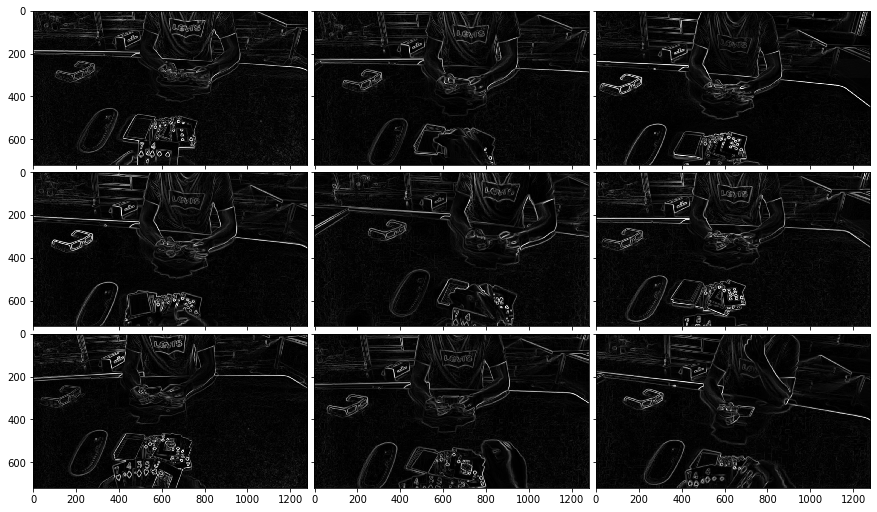

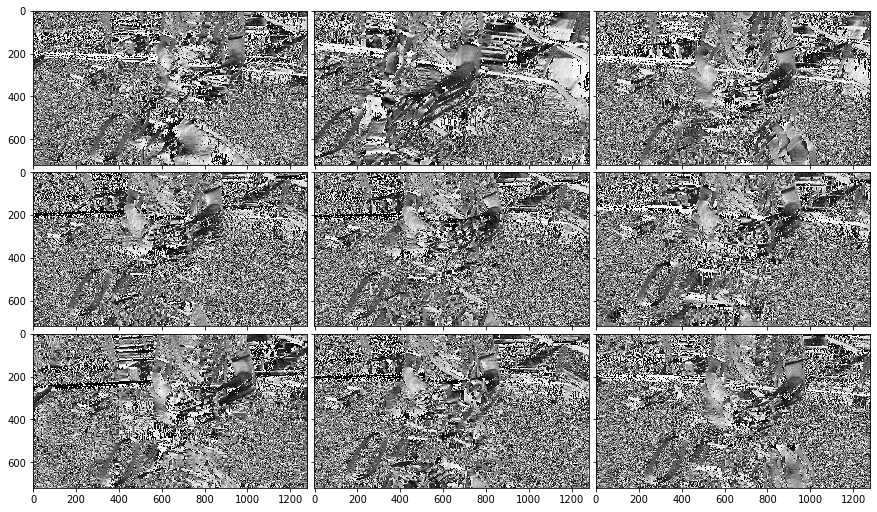

In [41]:
# Use your draw function to visualize the magnitude
draw_func(np.array(mag_imgs))

# # Use your draw function to visualize the orientation
draw_func(np.array(angles))

# Bonus: Search for super pixeling and apply it

In [36]:
# Your code here
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

super_pixels = []
for image in imgs:
    segments = slic(image, n_segments = 250,compactness=10, sigma=1)
    super_pixels.append(mark_boundaries(image,segments, color=(1,1,1), outline_color= (1,1,1)))
 
##

# Use your draw function to visualize the results


<ipython-input-36-4922517ab791>:7: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(image, n_segments = 250,compactness=10, sigma=1)


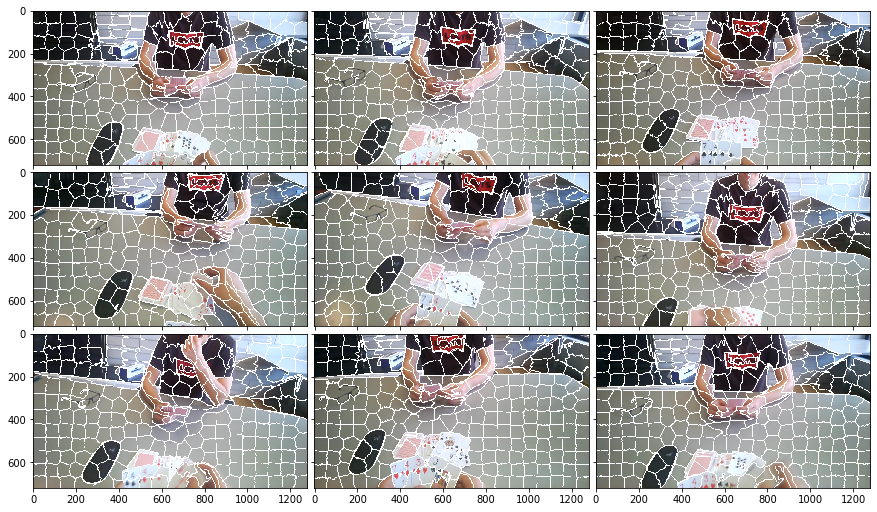

In [37]:
draw_func(np.array(super_pixels))